In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Introducción a la Vectorización y el Broadcasting en Python

En este notebook exploraremos cómo aprovechar la **vectorización** y el **broadcasting** para realizar operaciones eficientes con arrays de NumPy.

## 1. ¿Qué es la Vectorización?

La **vectorización** es una técnica que permite realizar operaciones matemáticas en colecciones de datos (como arrays o listas) sin usar bucles explícitos. NumPy utiliza implementaciones optimizadas en C para aplicar estas operaciones más rápido que los bucles de Python.

### Ejemplo de cálculo sin vectorización:

Suma de dos vectores aleatorios (`np.random.rand`) de dimensión 1000000. Usa `time.time()` para calcular el tiempo.

In [3]:
V = np.random.rand(1000000)
U = np.random.rand(1000000)

z = 0
t1 = time.time()
for u,v in zip(U,V):
    z += u*v
t2 = time.time()
print(f'Solución bucle= {z} \n Tiempo bucle: {(t2-t1)*1000} ms')

Solución bucle= 250219.0119066837 
 Tiempo bucle: 409.3942642211914 ms


### Ejemplo de cálculo con vectorización:

In [4]:
t1 = time.time()
z = np.dot(U,V)
t2 = time.time()
print(f'Solución vectorizada= {z} \n Tiempo vectorización: {(t2-t1)*1000} ms')

Solución vectorizada= 250219.01190669124 
 Tiempo vectorización: 1.5630722045898438 ms


### Otro ejemplo

In [5]:
n = 10000
A = np.random.rand(n,n)
V = np.random.rand(n)

t1 = time.time()
U = np.zeros(n)
for i in range(n):
    for j in range(n):
        U[i] += A[i,j]*V[j]
t2 = time.time()
print(f'Sum(U) no vectorizada= {sum(U)} \n Tiempo sin vectorización: {(t2-t1)*1000} ms')

t1 = time.time()
U = np.dot(A,V)
t2 = time.time()
print(f'Sum(U) vectorizada= {sum(U)} \n Tiempo con vectorización: {(t2-t1)*1000} ms')

Sum(U) no vectorizada= 24931335.84197002 
 Tiempo sin vectorización: 77961.85111999512 ms
Sum(U) vectorizada= 24931335.841970023 
 Tiempo con vectorización: 35.001277923583984 ms


### Uno más

 Tiempo sin vectorización: 162.07313537597656 ms
 Tiempo con vectorización: 1.7609596252441406 ms


[]

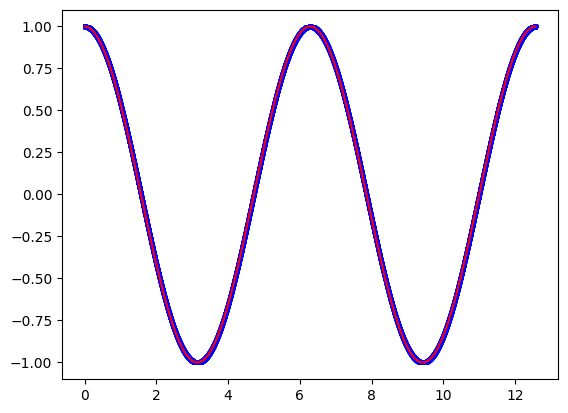

In [6]:
n = 100000

x = np.linspace(0,4*np.pi,n)

t1 = time.time()
y = np.zeros_like(x)
for i in range(n):
    y[i] = np.cos(x[i])
t2 = time.time()
print(f' Tiempo sin vectorización: {(t2-t1)*1000} ms')

t1 = time.time()
z = np.cos(x)
t2 = time.time()
print(f' Tiempo con vectorización: {(t2-t1)*1000} ms')

fig,ax = plt.subplots()
ax.plot(x,y,color = 'r')
ax.scatter(x,z,color = 'b', s = 5)
plt.plot()


# Ejercicio: Vectoriza las siguientes operaciones 

* Vectoriza el siguiente código

```python
A = np.random.rand(2,3)
B = np.random.rand(3,1)
C = np.zeros_like(A)

for i in range(2):
    for j in range(3):
        C[i,j] = A[i,j] + B[j,0]
```

In [11]:
A = np.random.rand(2,3)
B = np.random.rand(3,1)
C = np.zeros_like(A)

for i in range(2):
    for j in range(3):
        C[i,j] = A[i,j] + B[j,0]

print(C)

C = A + B.T 
print(C)

[[0.94272291 0.58646253 0.82046505]
 [1.17572489 0.65177664 0.81147277]]
[[0.94272291 0.58646253 0.82046505]
 [1.17572489 0.65177664 0.81147277]]


In [10]:
A = np.random.rand(2,3)
B = np.random.rand(3,1)
# C = np.zeros_like(A)

C = A + B.T 
print(C)

[[1.30849404 0.35844926 0.23151509]
 [1.19703384 0.73406226 0.29225871]]


* Vectoriza el siguiente código

```python
# Definición de V (vector columna) y A (matriz)
V = np.random.rand(5, 1)  # Vector columna de dimensión 5x1
A = np.random.rand(5, 3)  # Matriz de dimensión 5x3

n, m = A.shape
U = np.zeros(m)

for j in range(m):  # Recorremos columnas de A
    for i in range(n):  # Recorremos filas
        U[j] += V[i, 0] * A[i, j]
```

In [12]:
V = np.random.rand(5, 1)  # Vector columna de dimensión 5x1
A = np.random.rand(5, 3)  # Matriz de dimensión 5x3

U = np.dot(V.T,A)
print(U, U.shape)


[[1.39552075 1.93087936 1.62486157]] (1, 3)


#  Broadcasting

El **broadcasting** es una característica de NumPy que permite realizar operaciones entre arrays de diferentes formas (shapes). Cuando los tamaños no coinciden, NumPy "expande" los arrays más pequeños para que sean compatibles.

## Reglas del Broadcasting:
 1. Si las formas (shapes) de los arrays no coinciden, NumPy añade dimensiones extra al array más pequeño hasta que coincidan.
 2. Si una dimensión tiene tamaño 1, NumPy "replica" los datos para que coincida con la dimensión más grande.

### Ejemplo básico:

In [8]:
U = np.array([1,2,3,4,5])
k = 100
V = U+k
print(V)

U = np.reshape(U,(5,1))
print(U) 
V = U+k
print(V)

U = np.reshape(U,(1,5))
print(U) 
V = U+k
print(V)


[101 102 103 104 105]
[[1]
 [2]
 [3]
 [4]
 [5]]
[[101]
 [102]
 [103]
 [104]
 [105]]
[[1 2 3 4 5]]
[[101 102 103 104 105]]


In [9]:
A = np.reshape(range(1,7),(2,3))
print(A)
print(A.shape)

B = np.array([10,20,30])
print(B)
print(B.shape)
C = A+B
print(C)
print(C.shape)

B = np.array([10,20])
print(B)
print(B.shape)
C = A+B
print(C)
print(C.shape)

"""

B1 = np.array([10,20,30]).reshape(1,3)
print(B1.shape)

C = A+B1
print(C)
print(C.shape)

B2 = np.array([100,200]).reshape(2,1)
print(B2.shape)

C = A+B2
print(C)
print(C.shape)

"""

[[1 2 3]
 [4 5 6]]
(2, 3)
[10 20 30]
(3,)
[[11 22 33]
 [14 25 36]]
(2, 3)
[10 20]
(2,)


ValueError: operands could not be broadcast together with shapes (2,3) (2,) 

### Ejercicio: Uso de Broadcasting para normalizar matrices

Es muy habitual en aprendizaje automático que la información venga dada como una matriz de datos donde cada columnas representa una característica determinada de una muestra, siendo el número de filas el número de muestras. 

Muchos modelos requieren que la información de entrada esté normalizada así que va a ser habitual que tengamos que normalizar matrices usando el valor medio de cada columna. 
En el siguiente ejercicio vamos a normalizar una matriz de datos restando la media de cada columna.

In [ ]:
data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
#media = np.mean(data, axis=0).reshape(1,3)  # Media por columna (forma (1,3))
#media = data.mean(axis=0, keepdims = True)  # Media por columna (forma (1,3))
media = np.mean(data, axis=0, keepdims= True) # Media por columna (forma (1,3))
data_normalizada = data - media  # Broadcasting
print("Datos normalizados:")
print(data_normalizada)

## Ejercicios

* Crea un array $A$ de tamaño $(2x3x4)$ (2 matrices de 3 filas y 4 columnas) de manera que el elemento $A(i,j,k)= 100*i +10*j + k$ con $i = 1,2; j= 1,2,3; k = 1,2,3,4$ 

* Multiplica cada una de las dos marices de $3x4$ por la matriz:
$$
X = \begin{pmatrix}
1 & 0 & 0 & 0  \\
0 & 1 & 0 & 0  \\
0 & 0 & 1 & 0  
\end{pmatrix}
$$
elemento a elemento de manera que la salida tenga la misma estructuta que $A$ pero almacenando unicamente los elementos de cada una de las dos matrices donde el número de fila y el decolumna coinciden